Repeat the experiment described in Example 4.6. Instead of plotting the resulting path taken by Newton’s method (as shown in Figure 4.7) create a cost function history plot to ensure your algorithm properly converges to a point near the global minimum of the function. You may employ the implementation of Newton’s method described in Section 4.3.5 as a base for this Exercise.

Use Newton's Method to minimize: $g(w) = \frac{1}{50}(w^4 + w^2 + 10w) + 0.5$

In [29]:
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True   
import matplotlib.pyplot as plt
# import statment for gradient calculator
from autograd import grad
from autograd import numpy as np
from autograd import value_and_grad
from autograd import hessian

def newtons_method(g, max_its, w, **kwargs):
    gradient = grad(g)
    #eigenvals of a square matrix -- C in our example
    hess = hessian(g)
    
    epsilon = 10**(-7)
    if 'epsilon' in kwargs:
        epsilon = kwargs['epsilon']
        
    weight_history = [w]
    cost_history = [g(w)]
    
    for k in range(max_its):
        grad_eval = gradient(w)
        hess_eval = hess(w)
        
        hess_eval.shape = (int((np.size(hess_eval))**(.5)), int((np.size(hess_eval))**(.5)))
        #we're assuming it's positive aka convex
        
        print("A will be: ", hess_eval + epsilon*np.eye(w.size))
        #look at 4.8
        A = hess_eval + epsilon*np.eye(w.size)
        b = grad_eval
        
        #I don't follow how the below gets us to our next point
        w = np.linalg.solve(A,np.dot(A,w) - b)
        
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history, cost_history

hess_eval:  [[[1.54]]]
np.size-hess_eval = 1 raised to the .5:  1.0
new hess eval:  [[1.54]]
A will be:  [[1.5400001]]
hess_eval:  [[[0.57533484]]]
np.size-hess_eval = 1 raised to the .5:  1.0
new hess eval:  [[0.57533484]]
A will be:  [[0.57533494]]
hess_eval:  [[[0.12040887]]]
np.size-hess_eval = 1 raised to the .5:  1.0
new hess eval:  [[0.12040887]]
A will be:  [[0.12040897]]
hess_eval:  [[[0.51262945]]]
np.size-hess_eval = 1 raised to the .5:  1.0
new hess eval:  [[0.51262945]]
A will be:  [[0.51262955]]
hess_eval:  [[[0.41661475]]]
np.size-hess_eval = 1 raised to the .5:  1.0
new hess eval:  [[0.41661475]]
A will be:  [[0.41661485]]
hess_eval:  [[[0.40605598]]]
np.size-hess_eval = 1 raised to the .5:  1.0
new hess eval:  [[0.40605598]]
A will be:  [[0.40605608]]
hess_eval:  [[[0.40591937]]]
np.size-hess_eval = 1 raised to the .5:  1.0
new hess eval:  [[0.40591937]]
A will be:  [[0.40591947]]
hess_eval:  [[[0.40591934]]]
np.size-hess_eval = 1 raised to the .5:  1.0
new hess eval: 

<IPython.core.display.Javascript object>


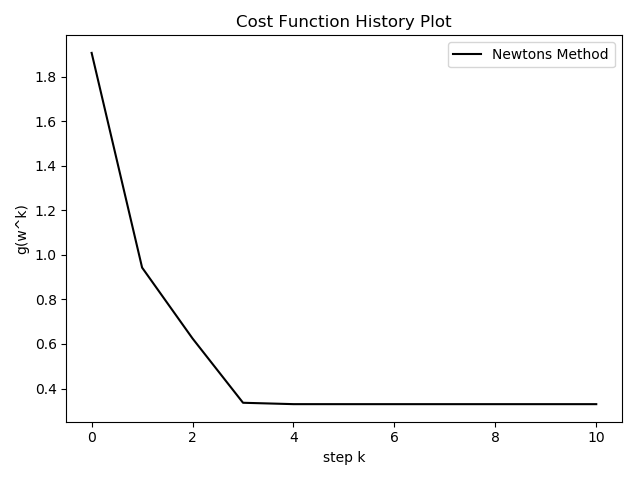

In [30]:
# init_point = 2.5
init_point = np.array([2.5])
g = lambda w: (1/50)*(w**4 + w**2 + 10*w) + .5
#based on 3.6 of previous hw i feel like this should minimize at -.2
iterations = 10

a1_wh, a1_ch = newtons_method(g, iterations, init_point)
# a2_wh, a2_ch = norm_gradient_descent(g, iterations, init_point, 'full')
# a3_wh, a3_ch = norm_gradient_descent(g, iterations, init_point, 'component')



plt.plot(a1_ch, 'k-', label = 'Newtons Method')
# plt.plot(a2_ch, 'm-', label = 'Fully Normalized grad descent')
# plt.plot(a3_ch, 'b-', label = 'Component Normalized grad descent')
plt.title("Cost Function History Plot")
plt.legend(loc="upper right")
plt.xlabel("step k")
plt.ylabel("g(w^k)")
plt.show()